In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pickle as pk

In [3]:
df = pd.read_csv("gym_members_exercise_tracking.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    int64  
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:
# Age, Gender, Weight, Height, Max_BPM, Avg_BPM, Resting_BPM, Session_Duration, Workout_Type, Fat_Percentage
# Scaling features
scaler = StandardScaler()
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                      'Session_Duration (hours)', 'Fat_Percentage']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [8]:
print(df['Workout_Type'].unique())

['Yoga' 'HIIT' 'Cardio' 'Strength']


In [9]:
# Use OneHotEncoder to encode Workout_Type

encoder = OneHotEncoder(sparse_output=False)
workout_type_encoded = encoder.fit_transform(df[['Workout_Type']])
workout_type_columns = encoder.get_feature_names_out(['Workout_Type'])

workout_type_df = pd.DataFrame(workout_type_encoded, columns=workout_type_columns, index=df.index)

df_encoded = pd.concat([df, workout_type_df], axis=1)
df_encoded = df_encoded.drop('Workout_Type', axis=1)

df_encoded

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.422343,1,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1313.0,-1.978321,3.5,4,3,30.20,0.0,0.0,0.0,1.0
1,0.600965,0,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,883.0,1.426301,2.1,4,2,32.00,0.0,1.0,0.0,0.0
2,-0.548964,0,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,677.0,1.346380,2.3,4,2,24.71,1.0,0.0,0.0,0.0
3,-1.123928,1,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,532.0,0.611110,2.1,3,1,18.41,0.0,0.0,1.0,0.0
4,-0.056137,1,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,556.0,0.675047,2.8,3,1,14.39,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.206066,1,0.624880,0.136465,0.617733,0.992716,0.652299,0.914598,1364.0,-2.393908,3.5,4,3,28.77,0.0,0.0,1.0,0.0
969,-1.123928,1,-0.342257,-0.881911,0.357311,1.550685,-0.849757,0.360432,1260.0,0.003713,3.0,2,1,25.69,0.0,0.0,1.0,0.0
970,1.668756,0,-0.634756,0.293138,1.225384,-1.657634,-1.259409,1.352098,929.0,-0.987304,2.7,5,3,19.50,1.0,0.0,0.0,0.0
971,-0.548964,1,2.478951,0.841495,1.572614,0.155764,-0.030454,-0.456235,883.0,0.515205,2.1,3,2,37.74,0.0,1.0,0.0,0.0


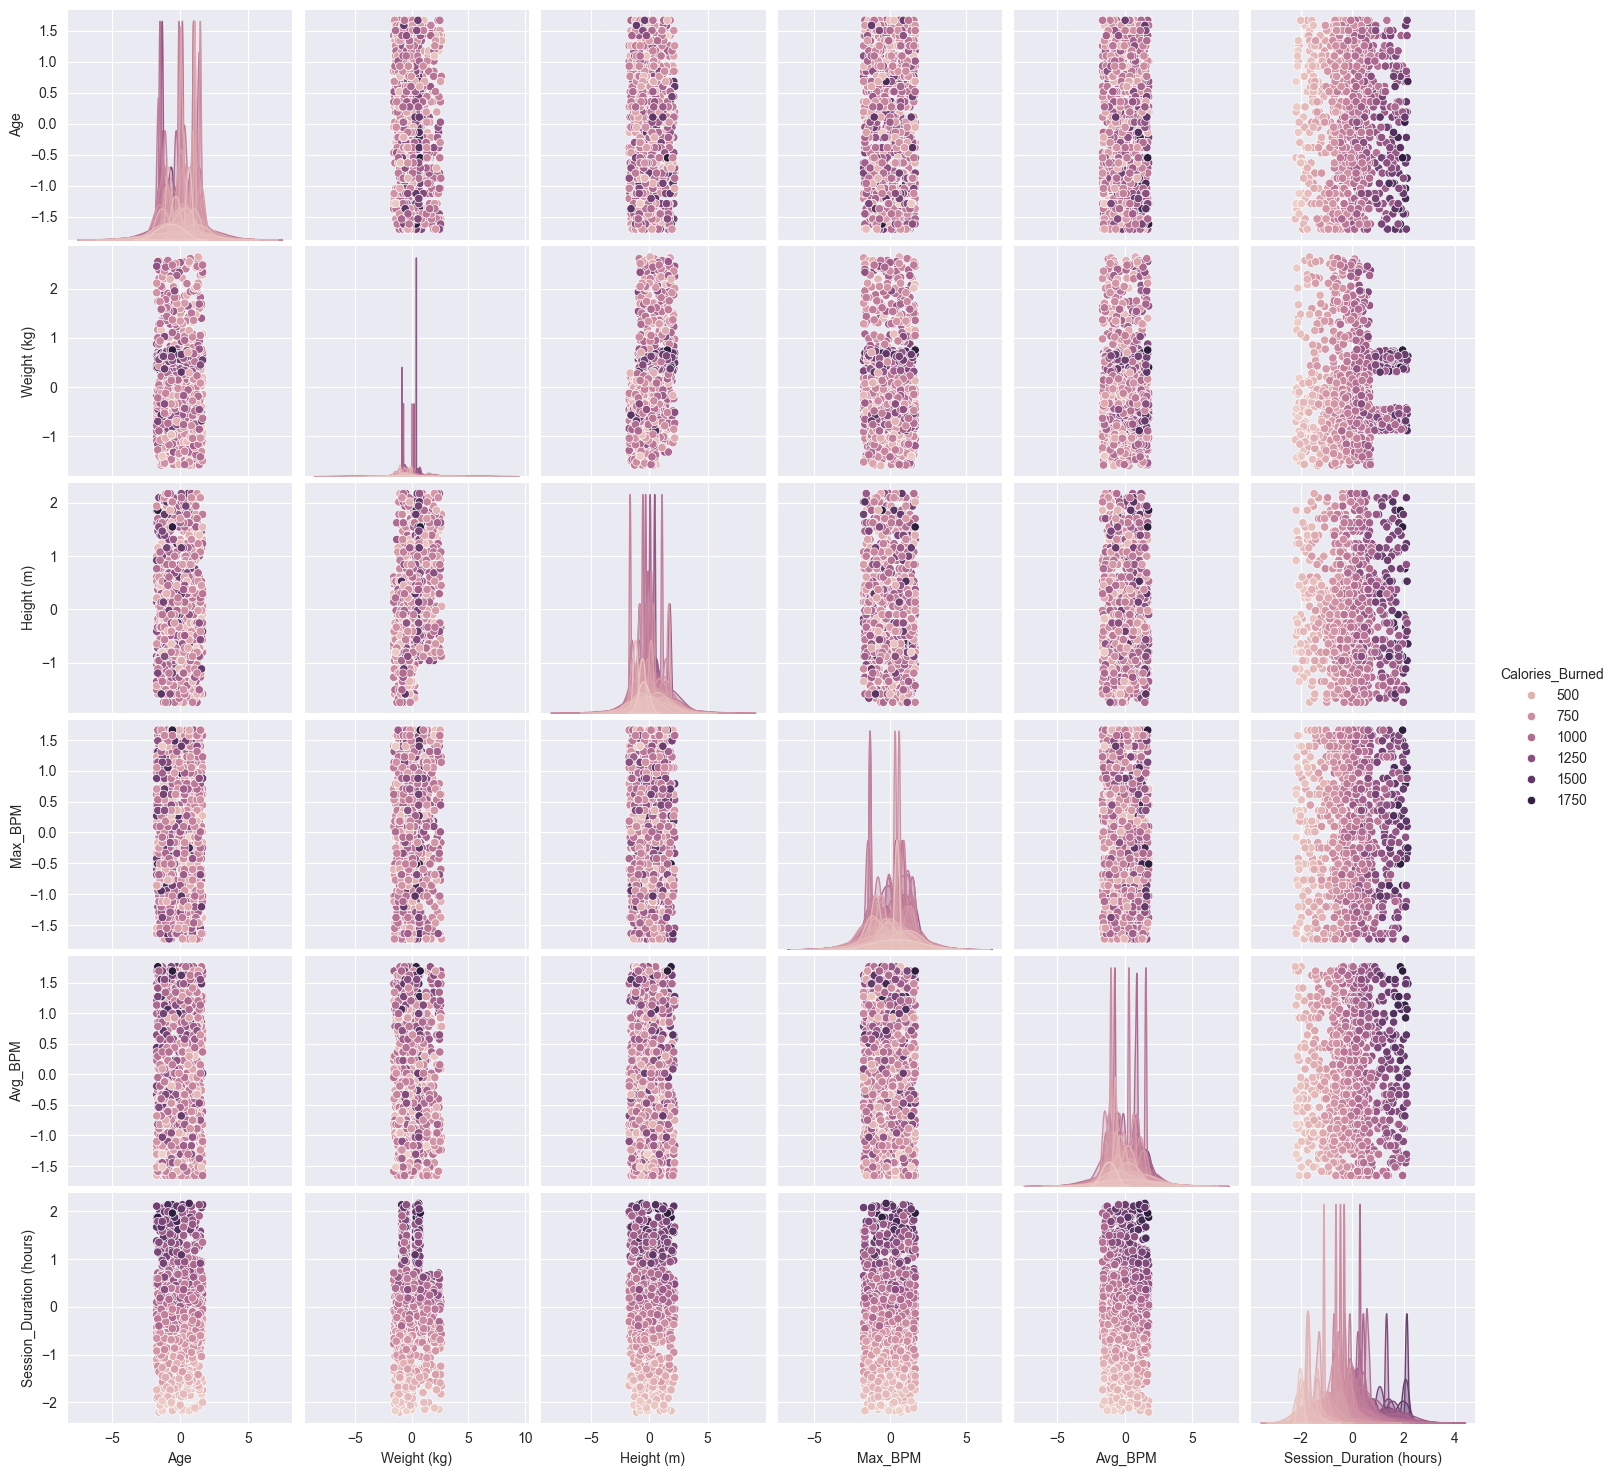

In [10]:
# Utilize visualization to analyze correlation between features and calories burned

df_encoded.drop(['Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'], axis=1, inplace=True)

selected_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Session_Duration (hours)']
sns.pairplot(df_encoded[selected_features + ['Calories_Burned']], hue='Calories_Burned')
plt.show()

In [11]:
# Split the data into training and testing samples
X = df_encoded.drop('Calories_Burned', axis=1)
y = df_encoded['Calories_Burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (778, 13)
Testing set shape: (195, 13)


In [12]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict calories burned
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = ((y_test - y_pred) ** 2).mean()
print(f"Mean squared error: {mse}")

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}") # 98% of variance can be explained

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(1638.2579284130297)
print(f"RMSE: {rmse}") # Prone to outliers

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

Mean squared error: 1638.2579284130297
R-squared Score: 0.9803625121379959
RMSE: 40.475399051930665
MAE: 30.156505752914896


In [14]:
# Inspect for outliers
description = df_encoded.describe()
print(description)

                Age      Gender   Weight (kg)    Height (m)       Max_BPM  \
count  9.730000e+02  973.000000  9.730000e+02  9.730000e+02  9.730000e+02   
mean   1.350981e-16    0.525180 -2.345959e-16 -8.324961e-16 -7.266085e-16   
std    1.000514e+00    0.499622  1.000514e+00  1.000514e+00  1.000514e+00   
min   -1.698893e+00    0.000000 -1.597175e+00 -1.743613e+00 -1.726066e+00   
25%   -8.775150e-01    0.000000 -7.432643e-01 -8.035741e-01 -8.579921e-01   
50%    1.081382e-01    1.000000 -1.818535e-01 -9.854471e-02  1.008143e-02   
75%    8.473782e-01    1.000000  5.729845e-01  6.064847e-01  8.781549e-01   
max    1.668756e+00    1.000000  2.644071e+00  2.173217e+00  1.659421e+00   

            Avg_BPM   Resting_BPM  Session_Duration (hours)  Calories_Burned  \
count  9.730000e+02  9.730000e+02              9.730000e+02       973.000000   
mean  -6.672748e-16 -1.830213e-16             -6.572338e-17       905.422405   
std    1.000514e+00  1.000514e+00              1.000514e+00       

In [15]:
# Create outlier function
def find_outliers(data):
    # Convert the data to a numpy array for easier calculations
    data = np.array(data)
    
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    # Calculate the outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers, lower_bound, upper_bound

In [16]:
find_outliers(df_encoded['Weight (kg)']) # MSE went up after removing the outliers

(array([2.60161179, 2.62520048, 2.56386989, 2.57330537, 2.57330537,
        2.64407143, 2.57330537, 2.54971668, 2.61104727]),
 np.float64(-2.7176375962336516),
 np.float64(2.5473578075436314))

In [17]:
# Save the model

with open('linear_regressor.pkl', 'wb') as model_file:
    pk.dump(model, model_file)